# Analysis of web scraping results

Next steps of analysis:

- a: Include comments for each step / Possibly include images of products
- b: Improve chart for total sume of products per day and per supermarket
    - Consider use of matplotlib, seaborn or other libraries (try use of Power BI?)
- c: Analyze which supermarket has the product with the smallest value for each day

This notebook covers the following steps:

1. Reading the results files and cleaning the data
2. Analyzing the results

### 1. Reading the results files and cleaning the data

We'll first obtain the path of the current directory and then save the path of each result file to a list.

In [1]:
# import libraries
import pandas as pd
import glob
import os
from datetime import datetime
import seaborn as sns
sns.set(style="dark")
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
# save path of the current directory to a variable and create a list with path and filenames
path = os.getcwd()
csv_files = glob.glob(path + "/webscraping_results/*.csv")

csv_files

['C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230225-2038.csv',
 'C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230304-1702.csv',
 'C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230319-1844.csv',
 'C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230326-1621.csv',
 'C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230331-1710.csv',
 'C:\\Users\\Clarissa\\Documents\\Datasets\\webscraping_project_01/webscraping_results\\webscraping_results_20230408-1747.csv']

The file with the first results didn't have a timestamp as a column, so we'll need to include that information extracting it from the filename.

In [3]:
# extract datetime from filename for first saved file
first_filename = os.path.basename(csv_files[0])
file_datetime = first_filename.split("_")[2].replace(".csv", "")
file_datetime = datetime.strptime(file_datetime, "%Y%m%d-%H%M")

# create dataframe with first file and include datetime as a column
df_first_result = pd.read_csv(csv_files[0]).drop(['Unnamed: 0'],axis=1)
df_first_result['datetime'] = file_datetime

# reorder columns
reordered_columns = ['datetime', 'supermarket', 'product', 'product_name', 'product_price']
df_first_result = df_first_result[reordered_columns]

df_first_result.head()

,datetime,supermarket,product,product_name,product_price
0,2023-02-25 20:38:00,sfw,Milk,Dairyland 2% Milk 1 L,2.99
1,2023-02-25 20:38:00,sfw,Tomato sauce,Hunt's Fat-Free Tomato Sauce 680 ml,2.99
2,2023-02-25 20:38:00,sfw,Spaguetti,Catelli Pasta Spaghetti 900 g,5.49
3,2023-02-25 20:38:00,sfw,Bacon,Schneiders Hickory Smoked Classic Cut Bacon 375 g,4.99
4,2023-02-25 20:38:00,sfw,Beans,Unico Black Beans 540 ml,2.49


For the rest of the files, we only need to concatenate them all together and drop the index column from the csv.

In [4]:
# create list of dataframes with files that had datetime column
df_list = (pd.read_csv(file) for file in csv_files[1:])

# concatenate all dataframes and drop index column from csv
webscraping_results = pd.concat(df_list, ignore_index=True).drop('Unnamed: 0', axis=1)

# concatenate dataframe with first results file
webscraping_results = pd.concat([df_first_result, webscraping_results])

webscraping_results

,datetime,supermarket,product,product_name,product_price
0,2023-02-25 20:38:00,sfw,Milk,Dairyland 2% Milk 1 L,2.99
1,2023-02-25 20:38:00,sfw,Tomato sauce,Hunt's Fat-Free Tomato Sauce 680 ml,2.99
2,2023-02-25 20:38:00,sfw,Spaguetti,Catelli Pasta Spaghetti 900 g,5.49
3,2023-02-25 20:38:00,sfw,Bacon,Schneiders Hickory Smoked Classic Cut Bacon 375 g,4.99
4,2023-02-25 20:38:00,sfw,Beans,Unico Black Beans 540 ml,2.49
...,...,...,...,...,...
95,2023-04-08 17:46:53.766343,sof,Strawberries,"Strawberries - Fresh, 1 Pound",6.99
96,2023-04-08 17:46:55.761157,sof,Bread,"Dempster's - White Bread - Sliced, 570 Gram",3.99
97,2023-04-08 17:46:57.616019,sof,Sliced ham,Maple Leaf - Natural Selections Sliced Deli Ha...,8.49
98,2023-04-08 17:46:59.400552,sof,Sliced cheese,"Cracker Barrel - Mozzarella Cheese Slices, 240...",6.99


Next we're going to check how many entries there are, if there are any null values and what are the types of each column.

In [5]:
# check dataframe
webscraping_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       112 non-null    object 
 1   supermarket    112 non-null    object 
 2   product        112 non-null    object 
 3   product_name   112 non-null    object 
 4   product_price  112 non-null    float64
dtypes: float64(1), object(4)
memory usage: 5.2+ KB


We can see that the datetime column is a string. To facilitate analysis or any other transformations, we'll have to convert it to a datetime type.

In [6]:
# change datetime column type from string to datetime
webscraping_results['datetime'] = pd.to_datetime(webscraping_results['datetime'])

webscraping_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       112 non-null    datetime64[ns]
 1   supermarket    112 non-null    object        
 2   product        112 non-null    object        
 3   product_name   112 non-null    object        
 4   product_price  112 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 5.2+ KB


We'll also include a column with just the date (format: YYYY-MM-DD).

In [7]:
# crate a column just for the date the scraping was done
webscraping_results['date'] = webscraping_results['datetime'].dt.date

webscraping_results.head()

,datetime,supermarket,product,product_name,product_price,date
0,2023-02-25 20:38:00,sfw,Milk,Dairyland 2% Milk 1 L,2.99,2023-02-25
1,2023-02-25 20:38:00,sfw,Tomato sauce,Hunt's Fat-Free Tomato Sauce 680 ml,2.99,2023-02-25
2,2023-02-25 20:38:00,sfw,Spaguetti,Catelli Pasta Spaghetti 900 g,5.49,2023-02-25
3,2023-02-25 20:38:00,sfw,Bacon,Schneiders Hickory Smoked Classic Cut Bacon 375 g,4.99,2023-02-25
4,2023-02-25 20:38:00,sfw,Beans,Unico Black Beans 540 ml,2.49,2023-02-25


Now that the dataframe is structured, we can start analyzing it.

### 2. Analyzing the results

Let's first take a look at the kinds of products that we have scraped so far.

In [8]:
webscraping_results['product'].unique()

array(['Milk', 'Tomato sauce', 'Spaguetti', 'Bacon', 'Beans',
       'Strawberries', 'Bread', 'Sliced ham', 'Sliced cheese', 'Hot dogs'],
      dtype=object)

Now we can take a look at the results for one of the products.

In [9]:
webscraping_results[webscraping_results['product'] == 'Hot dogs']

,datetime,supermarket,product,product_name,product_price,date
9,2023-03-04 17:02:37.628753,sfw,Hot dogs,Maple Leaf Natural Top Dogs Original Hot Dogs ...,3.99,2023-03-04
19,2023-03-04 17:02:47.548730,sof,Hot dogs,Maple Leaf - Natural Top Dogs Original Hot Dog...,7.49,2023-03-04
29,2023-03-19 18:44:00.032683,sfw,Hot dogs,Maple Leaf Natural Top Dogs Original Hot Dogs ...,6.79,2023-03-19
39,2023-03-19 18:44:17.473486,sof,Hot dogs,Maple Leaf - Natural Top Dogs Original Hot Dog...,7.49,2023-03-19
49,2023-03-26 16:20:47.774033,sfw,Hot dogs,Maple Leaf Natural Top Dogs Original Hot Dogs ...,6.99,2023-03-26
59,2023-03-26 16:21:01.878723,sof,Hot dogs,Maple Leaf - Natural Top Dogs Original Hot Dog...,7.49,2023-03-26
69,2023-03-31 17:10:35.641468,sfw,Hot dogs,Maple Leaf Natural Top Dogs Original Hot Dogs ...,6.99,2023-03-31
79,2023-03-31 17:10:48.729844,sof,Hot dogs,Maple Leaf - Natural Top Dogs Original Hot Dog...,7.49,2023-03-31
89,2023-04-08 17:46:36.089344,sfw,Hot dogs,Maple Leaf Natural Top Dogs Original Hot Dogs ...,6.49,2023-04-08
99,2023-04-08 17:47:01.063420,sof,Hot dogs,Maple Leaf - Natural Top Dogs Original Hot Dog...,7.49,2023-04-08


Then we can group the results by date and by supermarket and sum the price of each product in order to see if there any differences.

In [13]:
# what is the total value of the products per supermarket and per day
results_grouped = webscraping_results.groupby(['date', 'supermarket'])['product_price'].sum().unstack()

results_grouped

supermarket,sfw,sof
date,,
2023-02-25,26.24,26.14
2023-03-04,52.00,56.60
2023-03-19,55.10,55.60
2023-03-26,55.30,55.60
2023-03-31,52.96,56.10
2023-04-08,54.82,55.10


Let's make it easy to compare these values by plotting them in a line chart.

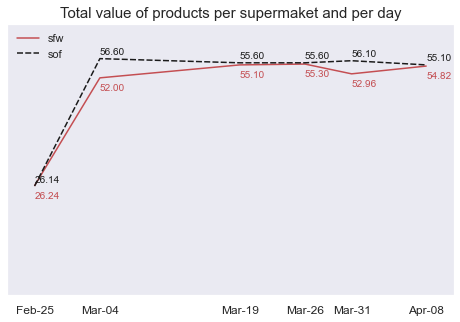

In [16]:
# define size and margins of the chart
fig, ax = plt.subplots(figsize=(8, 5))
plt.margins(0.07)

# plot chart
sns.lineplot(data=results_grouped, palette=['r', 'k'])

# set ttle of the plot
plt.title('Total value of products per supermaket and per day', fontsize=15)

# set limit of y axis and remove labels from y axis
plt.ylim(0, 65)
plt.tick_params(labelleft=False)

# set size of labels in x axis and remove title of x axis
plt.tick_params(axis='x', labelsize=12)
plt.xticks(results_grouped.index)
plt.xlabel('')

# format legend
plt.legend(frameon=False, loc='upper left')

# plot data labels for both line charts
for x, y in zip(results_grouped.index, results_grouped['sfw']):
    plt.text(x=x, y=y-3, s='{:.2f}'.format(y), fontsize=10, color='r')
    
for x, y in zip(results_grouped.index, results_grouped['sof']):
    plt.text(x=x, y=y+1, s='{:.2f}'.format(y), fontsize=10, color='k')

# define the date format
date_form = DateFormatter("%b-%d")
ax.xaxis.set_major_formatter(date_form)
    
plt.show()

In most days, the total value for products in the sof were higher than in the sfw, with the exception of the first scraping date.